In [ ]:
'''
Use hour temperate data to predict
energy usage. 
'''

In [1]:
#notebook set up
import os
import pandas as pd
import glob
import re

In [2]:
#get the current working directory using os module
cwd = os.getcwd()

#set up file path
file_path = os.path.join(cwd,'datasets', 'temperatures')

In [3]:
#Explore one file of hourly temperatures
test_file = os.path.join(file_path, '2023-02-12.csv')
pd.read_csv(test_file)

,Unnamed: 0,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,0,12:53 AM,34 °F,31 °F,89 °%,CALM,0 °mph,0 °mph,29.66 °in,0.0 °in,Partly Cloudy
1,1,1:53 AM,36 °F,31 °F,82 °%,CALM,0 °mph,0 °mph,29.65 °in,0.0 °in,Partly Cloudy
2,2,2:53 AM,34 °F,31 °F,89 °%,CALM,0 °mph,0 °mph,29.64 °in,0.0 °in,Partly Cloudy
3,3,3:53 AM,30 °F,28 °F,92 °%,CALM,0 °mph,0 °mph,29.64 °in,0.0 °in,Partly Cloudy
4,4,4:53 AM,29 °F,27 °F,92 °%,W,3 °mph,0 °mph,29.63 °in,0.0 °in,Fair
5,5,5:53 AM,28 °F,27 °F,96 °%,CALM,0 °mph,0 °mph,29.63 °in,0.0 °in,Fair
6,6,6:53 AM,27 °F,26 °F,96 °%,CALM,0 °mph,0 °mph,29.62 °in,0.0 °in,Fair
7,7,7:53 AM,32 °F,30 °F,92 °%,CALM,0 °mph,0 °mph,29.63 °in,0.0 °in,Fair
8,8,8:53 AM,44 °F,35 °F,71 °%,CALM,0 °mph,0 °mph,29.63 °in,0.0 °in,Mostly Cloudy
9,9,9:53 AM,53 °F,37 °F,55 °%,SSW,12 °mph,0 °mph,29.63 °in,0.0 °in,Mostly Cloudy


In [4]:
#explore data
pd.read_csv(test_file).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   34 non-null     int64 
 1   Time         24 non-null     object
 2   Temperature  24 non-null     object
 3   Dew Point    24 non-null     object
 4   Humidity     24 non-null     object
 5   Wind         24 non-null     object
 6   Wind Speed   24 non-null     object
 7   Wind Gust    24 non-null     object
 8   Pressure     24 non-null     object
 9   Precip.      24 non-null     object
 10  Condition    24 non-null     object
dtypes: int64(1), object(10)
memory usage: 3.0+ KB


In [ ]:
'''
All columns are object type. Temperature
column needs to be cast as int for descriptive 
stats 
'''

In [4]:
#use glob to get list of all csv files in desired directory
csv_files = glob.glob(os.path.join(file_path, '*.csv'))

#create regular expression
tempRegex = re.compile(r'(-)?\d*')

#create empty DataFrame
temp_frame = pd.DataFrame()

for file in csv_files:
    if not temp_frame.empty:
        #create DataFrame from csv
        df = pd.read_csv(file)  
        
        df.dropna(inplace=True)
        
        #temperature column is object, remove text
        '''
        for row in df.index:
            df.loc[row, 'Temperature'] = df.loc[row, 'Temperature'][:2]
            
        This method hard codes selected characters. In the 
        above example, temperatures between 0 and 99 are
        valid but anything over 100 would return only the
        first two characters. Same for negative numbers. 
        We will use a regular expression.
        '''
        
        for row in df.index:
            df.loc[row, 'Temperature'] = tempRegex.search(str(df.loc[row, 'Temperature'])).group()
        
        #convert tempreature column from object to int
        df = df.astype({'Temperature':'int'})
        
        #create DataFrame with only temperatures and times
        df_temp = pd.DataFrame({k:[v] for k,v in zip(df['Time'],df['Temperature'])})
        
        #add date of hourly temperatures to Dataframe
        #get file name
        file_name = os.path.basename(file)
        df_temp['date'] = os.path.splitext(file_name)[0]
        
        #concatenate DataFrames
        temp_frame = pd.concat((temp_frame, df_temp))
        
        
    else:
        #create DataFrame from csv
        df = pd.read_csv(file)  
        
        df.dropna(inplace=True)
        
        #temperature column is object, remove text
        for row in df.index:
            df.loc[row, 'Temperature'] = tempRegex.search(str(df.loc[row, 'Temperature'])).group()
        
        #convert temperature column from object to int
        df = df.astype({'Temperature':'int'})
        
        #create DataFrame with only temperatures and times
        temp_frame = pd.DataFrame({k:[v] for k,v in zip(df['Time'],df['Temperature'])})
        
        #add date of hourly temperatures to Dataframe
        #get file name
        file_name = os.path.basename(file)
        temp_frame['date'] = os.path.splitext(file_name)[0]
 
 

In [5]:
#examine the DataFrame
temp_frame.reset_index(drop=True, inplace=True)
display(temp_frame, temp_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Columns: 819 entries, 12:53 AM to 10:19 PM
dtypes: float64(818), object(1)
memory usage: 2.5+ MB


,12:53 AM,1:53 AM,2:53 AM,3:53 AM,4:53 AM,5:53 AM,6:53 AM,7:53 AM,8:53 AM,9:53 AM,...,4:05 AM,6:34 AM,9:58 AM,2:19 AM,9:08 PM,1:21 PM,8:50 PM,12:42 AM,3:18 AM,10:19 PM
0,33.0,35.0,33.0,33.0,32.0,31.0,35.0,37.0,48.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38.0,38.0,36.0,34.0,34.0,35.0,34.0,33.0,49.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,61.0,56.0,52.0,49.0,47.0,46.0,46.0,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41.0,41.0,40.0,38.0,37.0,35.0,34.0,35.0,39.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34.0,34.0,35.0,36.0,35.0,33.0,34.0,34.0,41.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,37.0,37.0,36.0,36.0,35.0,37.0,37.0,37.0,46.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN
397,61.0,61.0,62.0,63.0,63.0,63.0,63.0,63.0,65.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,62.0,NaN
398,39.0,39.0,40.0,43.0,45.0,48.0,51.0,56.0,60.0,63.0,...,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0
399,70.0,56.0,57.0,56.0,56.0,55.0,53.0,50.0,48.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None

In [6]:
'''
We have lots of extra columns, however, only 
some are universal. If you explore several
csv files you will see repeated sample
times. We will select only those. 

*these times many be different if your weather
data is from a different location than the 
example dataset
'''
time_list = ['12:53 AM', '1:53 AM', '2:53 AM', '3:53 AM', '4:53 AM', '5:53 AM',
       '6:53 AM', '7:53 AM', '8:53 AM', '9:53 AM', '10:53 AM', '11:53 AM',
       '12:53 PM', '1:53 PM', '2:53 PM', '3:53 PM', '4:53 PM', '5:53 PM',
       '6:53 PM', '7:53 PM', '8:53 PM', '9:53 PM', '10:53 PM', '11:53 PM',
       'date']
temp_time_frame = temp_frame[time_list].copy()
temp_time_frame

,12:53 AM,1:53 AM,2:53 AM,3:53 AM,4:53 AM,5:53 AM,6:53 AM,7:53 AM,8:53 AM,9:53 AM,...,3:53 PM,4:53 PM,5:53 PM,6:53 PM,7:53 PM,8:53 PM,9:53 PM,10:53 PM,11:53 PM,date
0,33.0,35.0,33.0,33.0,32.0,31.0,35.0,37.0,48.0,58.0,...,75.0,73.0,55.0,49.0,48.0,47.0,43.0,39.0,45.0,2022-01-13
1,38.0,38.0,36.0,34.0,34.0,35.0,34.0,33.0,49.0,59.0,...,76.0,73.0,65.0,57.0,54.0,48.0,55.0,NaN,NaN,2022-01-14
2,NaN,61.0,56.0,52.0,49.0,47.0,46.0,46.0,47.0,45.0,...,51.0,50.0,47.0,46.0,44.0,43.0,42.0,42.0,41.0,2022-01-15
3,41.0,41.0,40.0,38.0,37.0,35.0,34.0,35.0,39.0,42.0,...,61.0,62.0,52.0,40.0,36.0,33.0,33.0,35.0,35.0,2022-01-16
4,34.0,34.0,35.0,36.0,35.0,33.0,34.0,34.0,41.0,45.0,...,69.0,67.0,62.0,50.0,42.0,37.0,44.0,46.0,42.0,2022-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,37.0,37.0,36.0,36.0,35.0,37.0,37.0,37.0,46.0,52.0,...,69.0,68.0,67.0,66.0,65.0,63.0,61.0,61.0,61.0,2023-02-13
397,61.0,61.0,62.0,63.0,63.0,63.0,63.0,63.0,65.0,69.0,...,79.0,77.0,75.0,60.0,63.0,46.0,55.0,52.0,44.0,2023-02-14
398,39.0,39.0,40.0,43.0,45.0,48.0,51.0,56.0,60.0,63.0,...,78.0,78.0,76.0,73.0,68.0,68.0,69.0,70.0,71.0,2023-02-15
399,70.0,56.0,57.0,56.0,56.0,55.0,53.0,50.0,48.0,48.0,...,52.0,52.0,49.0,47.0,46.0,45.0,42.0,41.0,40.0,2023-02-16


In [7]:
#check for null values
temp_time_frame.isnull().sum()

12:53 AM     3
1:53 AM      1
2:53 AM      3
3:53 AM      1
4:53 AM      1
5:53 AM      1
6:53 AM      1
7:53 AM      1
8:53 AM      2
9:53 AM      4
10:53 AM     6
11:53 AM     6
12:53 PM     4
1:53 PM     13
2:53 PM      3
3:53 PM      7
4:53 PM      4
5:53 PM      2
6:53 PM      2
7:53 PM      2
8:53 PM      1
9:53 PM      1
10:53 PM     3
11:53 PM     3
date         0
dtype: int64

In [8]:
'''
ML algorithms cannot handle null values.
interpolate to remove
'''
temp_time_frame.interpolate(inplace=True)

In [9]:
'''
Its possible that we could get better results
by adding min, max, average values.'''
#add average first to prevent it from being skewed
temp_time_frame['average'] = temp_time_frame[time_list].mean(axis=1)
temp_time_frame['low'] = temp_time_frame[time_list].min(axis=1)
temp_time_frame['high'] = temp_time_frame[time_list].max(axis=1)

temp_time_frame

,12:53 AM,1:53 AM,2:53 AM,3:53 AM,4:53 AM,5:53 AM,6:53 AM,7:53 AM,8:53 AM,9:53 AM,...,6:53 PM,7:53 PM,8:53 PM,9:53 PM,10:53 PM,11:53 PM,date,average,low,high
0,33.0,35.0,33.0,33.0,32.0,31.0,35.0,37.0,48.0,58.0,...,49.0,48.0,47.0,43.0,39.0,45.0,2022-01-13,49.958333,31.0,75.0
1,38.0,38.0,36.0,34.0,34.0,35.0,34.0,33.0,49.0,59.0,...,57.0,54.0,48.0,55.0,40.5,43.0,2022-01-14,53.062500,33.0,77.0
2,39.5,61.0,56.0,52.0,49.0,47.0,46.0,46.0,47.0,45.0,...,46.0,44.0,43.0,42.0,42.0,41.0,2022-01-15,47.604167,39.5,61.0
3,41.0,41.0,40.0,38.0,37.0,35.0,34.0,35.0,39.0,42.0,...,40.0,36.0,33.0,33.0,35.0,35.0,2022-01-16,43.333333,33.0,62.0
4,34.0,34.0,35.0,36.0,35.0,33.0,34.0,34.0,41.0,45.0,...,50.0,42.0,37.0,44.0,46.0,42.0,2022-01-17,46.541667,33.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,37.0,37.0,36.0,36.0,35.0,37.0,37.0,37.0,46.0,52.0,...,66.0,65.0,63.0,61.0,61.0,61.0,2023-02-13,54.375000,35.0,70.0
397,61.0,61.0,62.0,63.0,63.0,63.0,63.0,63.0,65.0,69.0,...,60.0,63.0,46.0,55.0,52.0,44.0,2023-02-14,65.208333,44.0,80.0
398,39.0,39.0,40.0,43.0,45.0,48.0,51.0,56.0,60.0,63.0,...,73.0,68.0,68.0,69.0,70.0,71.0,2023-02-15,63.041667,39.0,79.0
399,70.0,56.0,57.0,56.0,56.0,55.0,53.0,50.0,48.0,48.0,...,47.0,46.0,45.0,42.0,41.0,40.0,2023-02-16,50.250000,40.0,70.0


In [10]:
#read in csv of energy usage
cwd = os.getcwd()
energy_path = os.path.join(cwd, 'datasets', 'power usage', 'green_button_data.csv')

#remove header using skip rows, allows proper column names
energy_frame = pd.read_csv(energy_path, skiprows=14)

In [12]:
#explore data
display(energy_frame.head(), energy_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0    Energy consumption time period       813 non-null    object 
 1   Usage(Real energy in kilowatt-hours)  805 non-null    object 
 2   Cost(US Dollar)                       402 non-null    object 
 3   Events occurred                       0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 25.5+ KB


,Energy consumption time period,Usage(Real energy in kilowatt-hours),Cost(US Dollar),Events occurred
0,2022-01-13 00:00 to 2022-01-14 00:00,11.420,1.07,NaN
1,2022-01-14 00:00 to 2022-01-15 00:00,8.080,0.76,NaN
2,2022-01-15 00:00 to 2022-01-16 00:00,13.470,1.26,NaN
3,2022-01-16 00:00 to 2022-01-17 00:00,10.770,1.01,NaN
4,2022-01-17 00:00 to 2022-01-18 00:00,8.980,0.84,NaN


None

In [16]:
'''
813 rows is much larger than the expect number
of rows and doesn't match the cost(US Dollar) 
column. The data was scrapped to match the 
range provided by the electric company. We will 
need to explore the data more. 
''';

In [17]:
'''
Duplicates probably exist, drop duplicates and keep
the first occurance of them. drop duplicates
defines a duplicate as all columns being 
identical. We are interested in dropping 
duplicates in the date only columns so we need
to use the subset argument. We will also
drop the events occured column because it
doesn't relate to our goal. 
'''
energy_frame.drop_duplicates(subset=' Energy consumption time period', inplace=True)
energy_frame.drop(axis=1, columns='Events occurred', inplace=True)
energy_frame

,Energy consumption time period,Usage(Real energy in kilowatt-hours),Cost(US Dollar)
0,2022-01-13 00:00 to 2022-01-14 00:00,11.420,1.07
1,2022-01-14 00:00 to 2022-01-15 00:00,8.080,0.76
2,2022-01-15 00:00 to 2022-01-16 00:00,13.470,1.26
3,2022-01-16 00:00 to 2022-01-17 00:00,10.770,1.01
4,2022-01-17 00:00 to 2022-01-18 00:00,8.980,0.84
...,...,...,...
403,Type of readings: Electricity,Energy Consumption,Real energy in kilowatts
405,Detailed Usage,NaN,NaN
407,Start date: 2022-01-13 00:00 for 401 days,NaN,NaN
409,Interval Blockdata for period starting:,2022-01-13 00:00 for 401 days,NaN


In [18]:
'''
Now we can see that there was unexpected
rows in the CSV file which need to be dropped.
we can handle this one of two ways, by dropping
the rows or reading in the file again and using
the nrows argument. 
'''
#energy_frame = pd.read_csv(energy_path, skiprows=14, nrows=400)
#399 rows is slightly off, this is because when the csv was downloaded
#eneragy consumption wasn't available for that day. 
energy_frame = energy_frame.loc[:399, :]
energy_frame

,Energy consumption time period,Usage(Real energy in kilowatt-hours),Cost(US Dollar)
0,2022-01-13 00:00 to 2022-01-14 00:00,11.420,1.07
1,2022-01-14 00:00 to 2022-01-15 00:00,8.080,0.76
2,2022-01-15 00:00 to 2022-01-16 00:00,13.470,1.26
3,2022-01-16 00:00 to 2022-01-17 00:00,10.770,1.01
4,2022-01-17 00:00 to 2022-01-18 00:00,8.980,0.84
...,...,...,...
395,2023-02-12 00:00 to 2023-02-13 00:00,16.250,1.57
396,2023-02-13 00:00 to 2023-02-14 00:00,7.020,0.68
397,2023-02-14 00:00 to 2023-02-15 00:00,5.910,0.57
398,2023-02-15 00:00 to 2023-02-16 00:00,9.040,0.87


In [19]:
'''
values in dates columns does not match 
our hour temperature dataframe. We need
to convert so we can join the two data
frames. 
'''
dateRegex = re.compile(r'\d{4}-\d{2}-\d{2}')

for i in energy_frame.index:
    energy_frame.loc[i,' Energy consumption time period'] = dateRegex.search(str(energy_frame.loc[i,
                                                                           ' Energy consumption time period'])).group()
    
energy_frame.head()

C:\Users\rab53\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\rab53\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Energy consumption time period,Usage(Real energy in kilowatt-hours),Cost(US Dollar)
0,2022-01-13,11.420,1.07
1,2022-01-14,8.080,0.76
2,2022-01-15,13.470,1.26
3,2022-01-16,10.770,1.01
4,2022-01-17,8.980,0.84


In [20]:
#merge DataFrames
energy_usage = pd.merge(energy_frame, temp_time_frame, 
                        left_on=' Energy consumption time period',
                        right_on='date').drop('date', axis=1)
energy_usage

,Energy consumption time period,Usage(Real energy in kilowatt-hours),Cost(US Dollar),12:53 AM,1:53 AM,2:53 AM,3:53 AM,4:53 AM,5:53 AM,6:53 AM,...,5:53 PM,6:53 PM,7:53 PM,8:53 PM,9:53 PM,10:53 PM,11:53 PM,average,low,high
0,2022-01-13,11.420,1.07,33.0,35.0,33.0,33.0,32.0,31.0,35.0,...,55.0,49.0,48.0,47.0,43.0,39.0,45.0,49.958333,31.0,75.0
1,2022-01-14,8.080,0.76,38.0,38.0,36.0,34.0,34.0,35.0,34.0,...,65.0,57.0,54.0,48.0,55.0,40.5,43.0,53.062500,33.0,77.0
2,2022-01-15,13.470,1.26,39.5,61.0,56.0,52.0,49.0,47.0,46.0,...,47.0,46.0,44.0,43.0,42.0,42.0,41.0,47.604167,39.5,61.0
3,2022-01-16,10.770,1.01,41.0,41.0,40.0,38.0,37.0,35.0,34.0,...,52.0,40.0,36.0,33.0,33.0,35.0,35.0,43.333333,33.0,62.0
4,2022-01-17,8.980,0.84,34.0,34.0,35.0,36.0,35.0,33.0,34.0,...,62.0,50.0,42.0,37.0,44.0,46.0,42.0,46.541667,33.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2023-02-12,16.250,1.57,34.0,36.0,34.0,30.0,29.0,28.0,27.0,...,59.0,53.0,48.0,45.0,42.0,40.0,39.0,46.083333,27.0,63.0
396,2023-02-13,7.020,0.68,37.0,37.0,36.0,36.0,35.0,37.0,37.0,...,67.0,66.0,65.0,63.0,61.0,61.0,61.0,54.375000,35.0,70.0
397,2023-02-14,5.910,0.57,61.0,61.0,62.0,63.0,63.0,63.0,63.0,...,75.0,60.0,63.0,46.0,55.0,52.0,44.0,65.208333,44.0,80.0
398,2023-02-15,9.040,0.87,39.0,39.0,40.0,43.0,45.0,48.0,51.0,...,76.0,73.0,68.0,68.0,69.0,70.0,71.0,63.041667,39.0,79.0


In [21]:
#rename columns
energy_usage.rename(columns={'Usage(Real energy in kilowatt-hours)': 'Usage(Kwh)',
                            ' Energy consumption time period': 'time period'}, inplace=True)

In [22]:
#examine data 
energy_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time period      400 non-null    object 
 1   Usage(Kwh)       400 non-null    object 
 2   Cost(US Dollar)  400 non-null    object 
 3   12:53 AM         400 non-null    float64
 4   1:53 AM          400 non-null    float64
 5   2:53 AM          400 non-null    float64
 6   3:53 AM          400 non-null    float64
 7   4:53 AM          400 non-null    float64
 8   5:53 AM          400 non-null    float64
 9   6:53 AM          400 non-null    float64
 10  7:53 AM          400 non-null    float64
 11  8:53 AM          400 non-null    float64
 12  9:53 AM          400 non-null    float64
 13  10:53 AM         400 non-null    float64
 14  11:53 AM         400 non-null    float64
 15  12:53 PM         400 non-null    float64
 16  1:53 PM          400 non-null    float64
 17  2:53 PM         

In [23]:
#convert usage column to float64
energy_usage= energy_usage.astype({'Usage(Kwh)':'float64'})

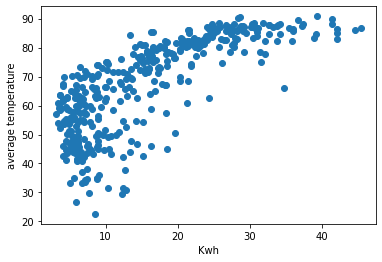

In [24]:
#plot to see relationship
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(energy_usage['Usage(Kwh)'], energy_usage['average'])
plt.xlabel('Kwh')
plt.ylabel('average temperature');

In [25]:
'''
Energy usage is fairly consistent at higher
average temperatures but noisy at lower 
temperatures. For my energy usage this is
probably because laundry is done on the 
weekends. Need to add days of the week to
the dataframe.
'''
#change time period to datetime dtype and set to index
energy_usage.set_index(pd.to_datetime(energy_usage['time period']), inplace=True)

#add columns to show day of the week in binary columns
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(len(days)):
    energy_usage[[days[i]]] = (energy_usage.index.dayofweek == i).astype(float)
    
energy_usage.drop(['time period'], axis=1, inplace=True)
    
energy_usage

,Usage(Kwh),Cost(US Dollar),12:53 AM,1:53 AM,2:53 AM,3:53 AM,4:53 AM,5:53 AM,6:53 AM,7:53 AM,...,average,low,high,Mon,Tue,Wed,Thu,Fri,Sat,Sun
time period,,,,,,,,,,,,,,,,,,,,,
2022-01-13,11.42,1.07,33.0,35.0,33.0,33.0,32.0,31.0,35.0,37.0,...,49.958333,31.0,75.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2022-01-14,8.08,0.76,38.0,38.0,36.0,34.0,34.0,35.0,34.0,33.0,...,53.062500,33.0,77.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2022-01-15,13.47,1.26,39.5,61.0,56.0,52.0,49.0,47.0,46.0,46.0,...,47.604167,39.5,61.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2022-01-16,10.77,1.01,41.0,41.0,40.0,38.0,37.0,35.0,34.0,35.0,...,43.333333,33.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-17,8.98,0.84,34.0,34.0,35.0,36.0,35.0,33.0,34.0,34.0,...,46.541667,33.0,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-12,16.25,1.57,34.0,36.0,34.0,30.0,29.0,28.0,27.0,32.0,...,46.083333,27.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-02-13,7.02,0.68,37.0,37.0,36.0,36.0,35.0,37.0,37.0,37.0,...,54.375000,35.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-02-14,5.91,0.57,61.0,61.0,62.0,63.0,63.0,63.0,63.0,63.0,...,65.208333,44.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#get list of columns
energy_usage.columns

Index(['Usage(Kwh)', 'Cost(US Dollar)', '12:53 AM', '1:53 AM', '2:53 AM',
       '3:53 AM', '4:53 AM', '5:53 AM', '6:53 AM', '7:53 AM', '8:53 AM',
       '9:53 AM', '10:53 AM', '11:53 AM', '12:53 PM', '1:53 PM', '2:53 PM',
       '3:53 PM', '4:53 PM', '5:53 PM', '6:53 PM', '7:53 PM', '8:53 PM',
       '9:53 PM', '10:53 PM', '11:53 PM', 'average', 'low', 'high', 'Mon',
       'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
      dtype='object')

In [ ]:
'''
Ready to make predict usage based on
temperature. 
'''

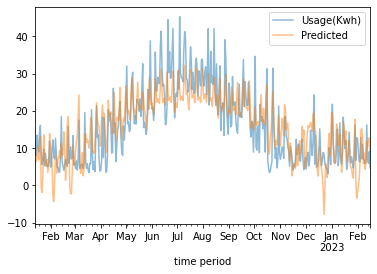

In [27]:
from sklearn.linear_model import LinearRegression

#create array of data
column_names = ['average', 'Mon', 'Tue', 'Wed', 
                'Thu', 'Fri', 'Sat', 'Sun']

X, y = energy_usage[column_names], energy_usage['Usage(Kwh)']

model = LinearRegression() 
model.fit(X, y)

energy_usage['Predicted'] = model.predict(X)

energy_usage[['Usage(Kwh)', 'Predicted']].plot(alpha=0.5);

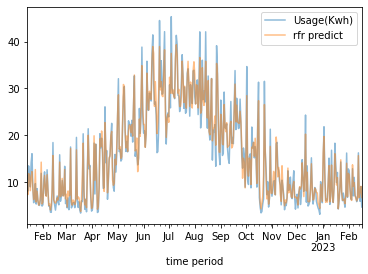

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0)
rfr.fit(X, y)

energy_usage['rfr predict'] = rfr.predict(X)

energy_usage[['Usage(Kwh)', 'rfr predict']].plot(alpha=0.5);